In [4]:
import numpy as np

In [5]:
# randomly initializing K centroid by picking K samples from X
def initialize_random_centroids(K, X):
    """Initializes and returns k random centroids"""
    m, n = np.shape(X)
    # a centroid should be of shape (1, n), so the centroids array will be of shape (K, n)
    centroids = np.empty((K, n))
    for i in range(K):
        # pick a random data point from X as the centroid
        centroids[i] =  X[np.random.choice(range(m))] 
    return centroids
def euclidean_distance(x1, x2):
    """Calculates and returns the euclidean distance between two vectors x1 and x2"""
    return np.sqrt(np.sum(np.power(x1 - x2, 2)))

def closest_centroid(x, centroids, K):
    """Finds and returns the index of the closest centroid for a given vector x"""
    distances = np.empty(K)
    for i in range(K):
        distances[i] = euclidean_distance(centroids[i], x)
    return np.argmin(distances) # return the index of the lowest distance
def create_clusters(centroids, K, X):
    """Returns an array of cluster indices for all the data samples"""
    m, _ = np.shape(X)
    cluster_idx = np.empty(m)
    for i in range(m):
        cluster_idx[i] = closest_centroid(X[i], centroids, K)
    return cluster_idx
def compute_means(cluster_idx, K, X):
    """Computes and returns the new centroids of the clusters"""
    _, n = np.shape(X)
    centroids = np.empty((K, n))
    for i in range(K):
        points = X[cluster_idx == i] # gather points for the cluster i
        centroids[i] = np.mean(points, axis=0) # use axis=0 to compute means across points
    return centroids

In [6]:
# Implement a simple k-means algorithm in Python on Colab with the following initialization:
x1 = (10, 10)
x2 = (-10, -10)
x3 = (2, 2)
x4 = (3, 3)
x5 = (-3, -3)

def run_Kmeans(K, X, max_iterations=500):
    """Runs the K-means algorithm and computes the final clusters"""
    # initialize random centroids
    centroids = initialize_random_centroids(K, X)
    # loop till max_iterations or convergance
    print(f"initial centroids: {centroids}")
    for _ in range(max_iterations):
        # create clusters by assigning the samples to the closet centroids
        clusters = create_clusters(centroids, K, X)
        previous_centroids = centroids                                                                                                                                                                                                                                                                                                                                                                                                                                                                              
        # compute means of the clusters and assign to centroids
        centroids = compute_means(clusters, K, X)
        # if the new_centroids are the same as the old centroids, return clusters
        diff = previous_centroids - centroids
        if not diff.any():
            return clusters
    return clusters

In [7]:
from sklearn import datasets
# creating a dataset for clustering
X, y = datasets.make_blobs()
y_preds = run_Kmeans(3, X)

initial centroids: [[-4.50637488  3.93110951]
 [ 1.25547     0.72409229]
 [ 8.16043165  4.02512856]]


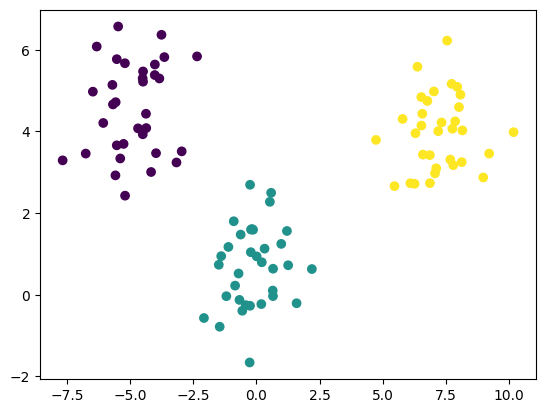

In [8]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y_preds, cmap='viridis')
plt.show()

# p.plot_in_2d(X, y_preds, title="K-Means Clustering")
# p.plot_in_2d(X, y, title="Actual Clustering")